In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas  as pd
import os

In [35]:
main_lst = [folder for folder in os.listdir('/home/jd.guerrero/Documents/g.esposito/AlternativeModels-SC2/') if 'epochs' in folder and not folder.endswith('.zip')]
main_lst

['400epochs_2',
 '100epochs_0',
 '100epochs_1',
 '100epochs_2',
 '400epochs',
 '400epochs_0',
 '400epochs_1']

/home/jd.guerrero/Documents/g.esposito/AlternativeModels-SC2/400epochs_2/step_3/gamma_0.99/start_lr_0.15/weight_decay_6e-05
train_loss (min): 1.52976393699646
val_loss (min): 0.8745147585868835
val_acc5 (max): 95.92872619628906
train_acc1 (max): 58.79185104370117
train_acc5 (max): 84.84773254394531
val_acc1 (max): 73.37133026123047
/home/jd.guerrero/Documents/g.esposito/AlternativeModels-SC2/100epochs_0/step_10/gamma_0.1/start_lr_0.1/weight_decay_0.0001
validation_acc1 (max): 67.08200073242188
/home/jd.guerrero/Documents/g.esposito/AlternativeModels-SC2/100epochs_1/step_20/gamma_0.1/start_lr_0.1/weight_decay_0.0001
train_loss (min): 3.154331684112549
val_loss (min): 2.883705139160156
val_acc5 (max): 57.55781936645508
train_acc1 (max): 23.144567489624023
train_acc5 (max): 51.06238555908203
val_acc1 (max): 27.542377471923828
/home/jd.guerrero/Documents/g.esposito/AlternativeModels-SC2/100epochs_1/step_10/gamma_0.1/start_lr_0.1/weight_decay_0.0001
/home/jd.guerrero/Documents/g.esposito/Al

<ipython-input-36-c6f25329af94>:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1)


val_acc1 (max): 30.866117477416992
/home/jd.guerrero/Documents/g.esposito/AlternativeModels-SC2/400epochs/step_3/gamma_0.99/start_lr_0.15/weight_decay_6e-05
train_loss (min): 1.5181407928466797
val_loss (min): 0.891334056854248
val_acc5 (max): 95.54408264160156
train_acc1 (max): 58.55428695678711
train_acc5 (max): 84.87165069580078
val_acc1 (max): 72.82047271728516
/home/jd.guerrero/Documents/g.esposito/AlternativeModels-SC2/400epochs_0/step_3/gamma_0.99/start_lr_0.3/weight_decay_6e-05
train_loss (min): 1.7282172441482544
val_loss (min): 1.0725096464157104
val_acc5 (max): 93.894287109375
train_acc1 (max): 53.64277648925781
train_acc5 (max): 81.91166687011719
val_acc1 (max): 68.20950317382812
/home/jd.guerrero/Documents/g.esposito/AlternativeModels-SC2/400epochs_1/step_3/gamma_0.99/start_lr_0.2/weight_decay_6e-05
train_loss (min): 1.584266185760498
val_loss (min): 0.8341372609138489
val_acc5 (max): 96.27191925048828
train_acc1 (max): 57.38440704345703
train_acc5 (max): 84.31719970703125

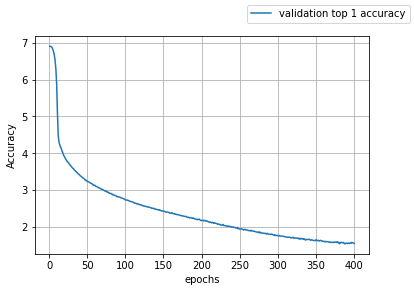

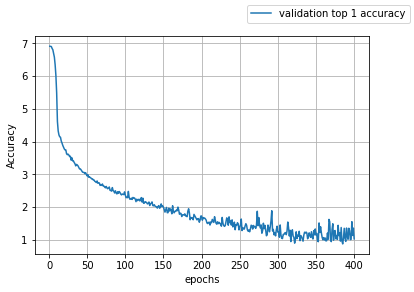

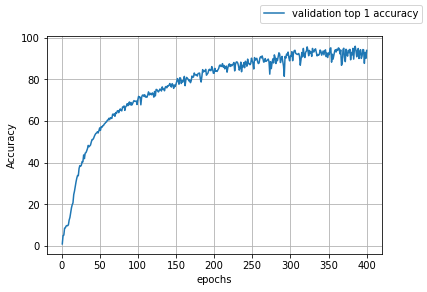

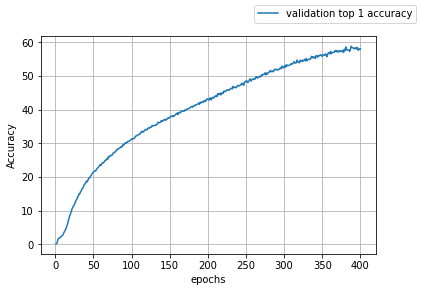

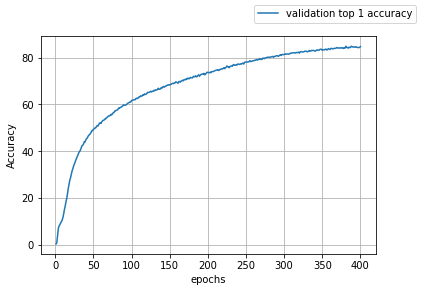

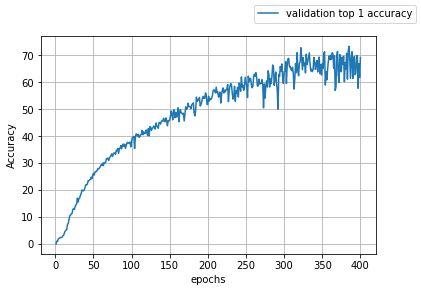

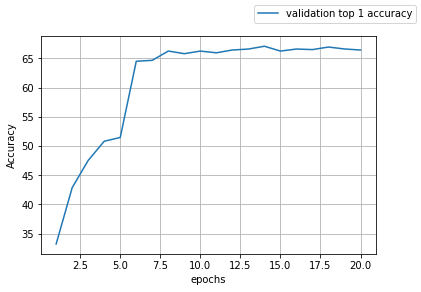

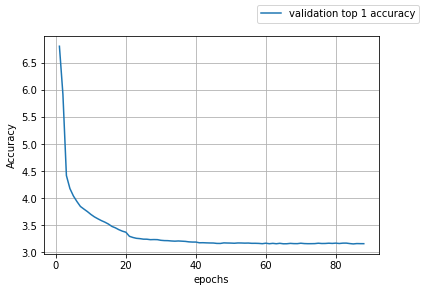

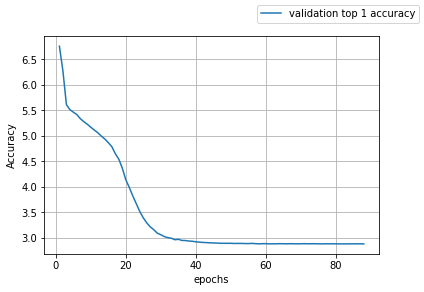

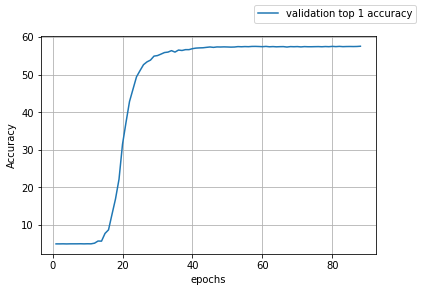

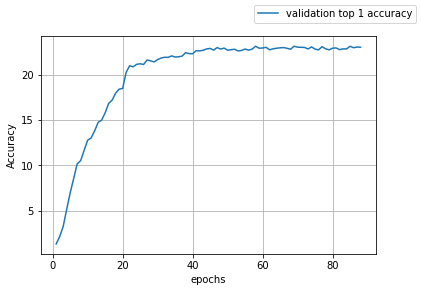

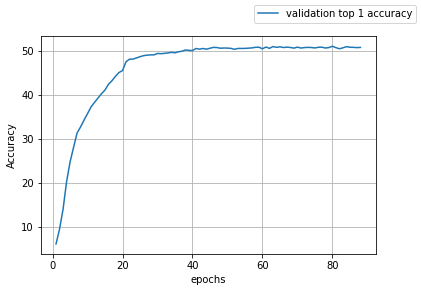

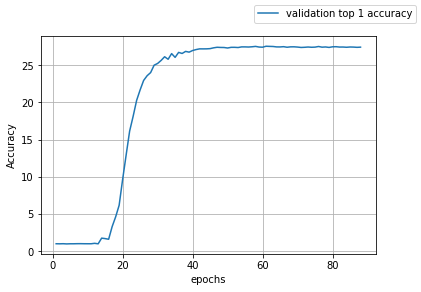

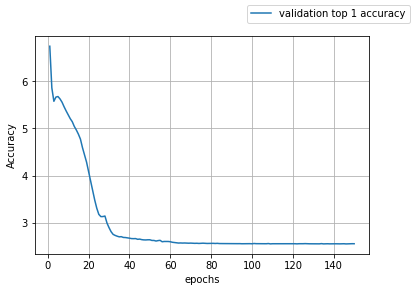

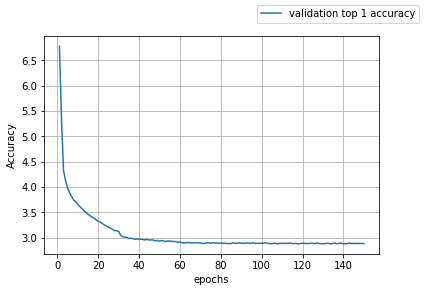

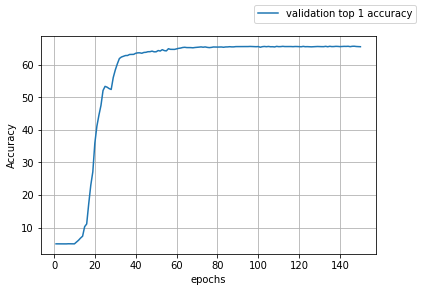

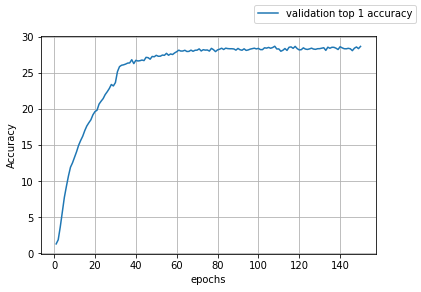

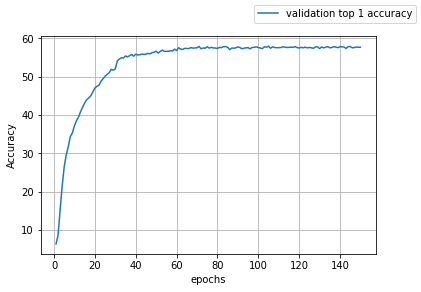

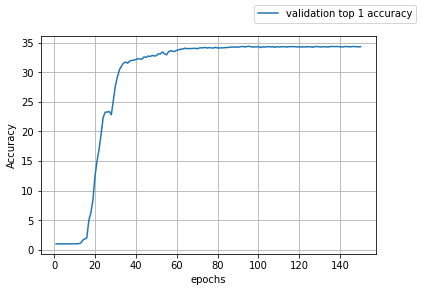

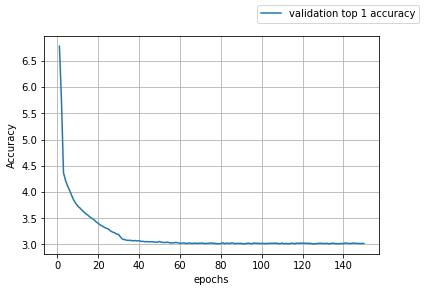

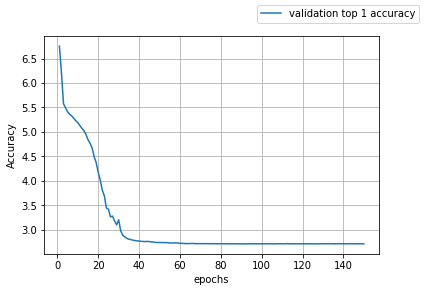

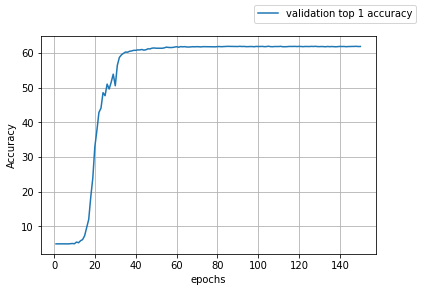

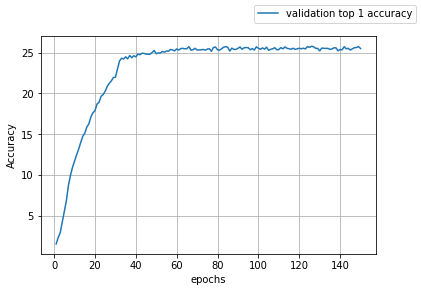

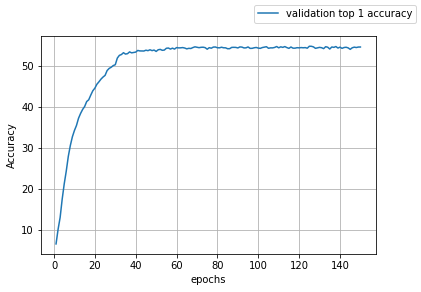

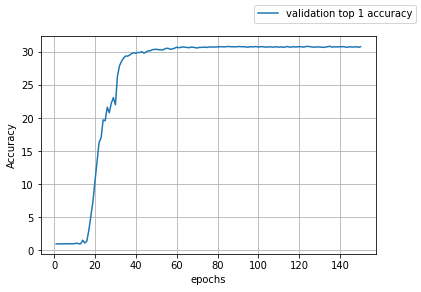

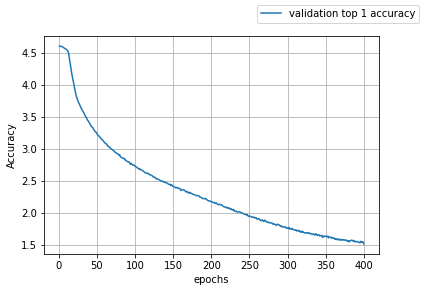

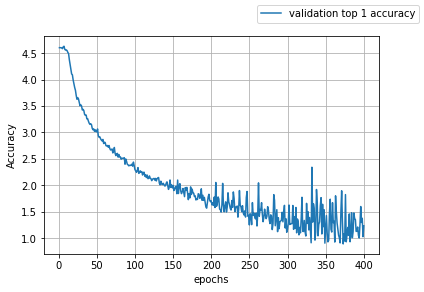

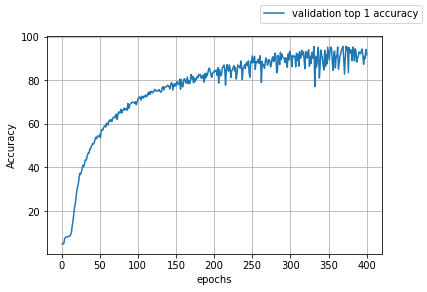

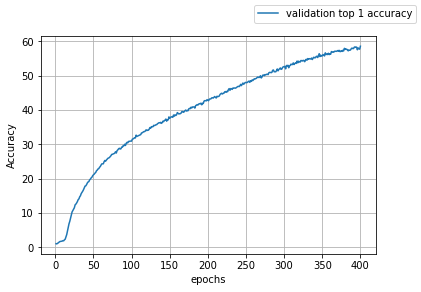

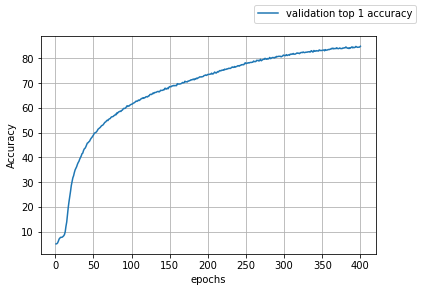

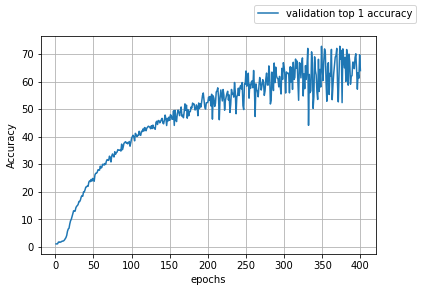

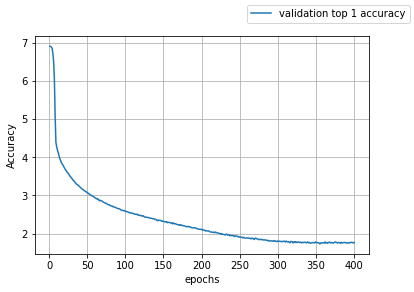

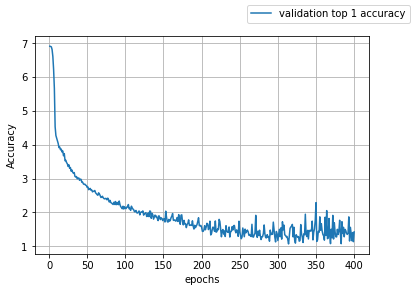

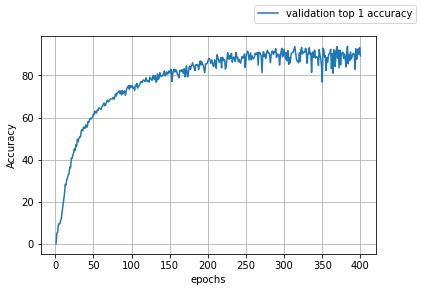

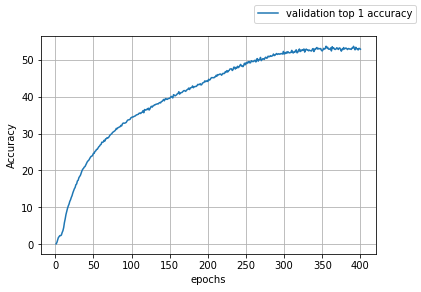

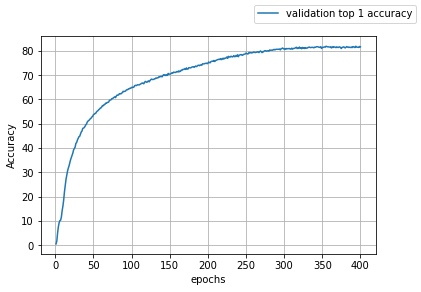

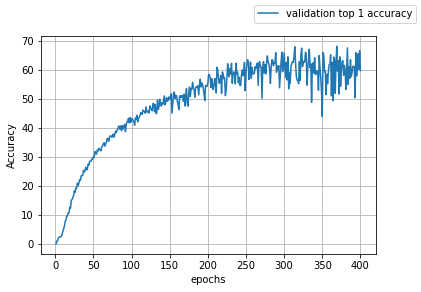

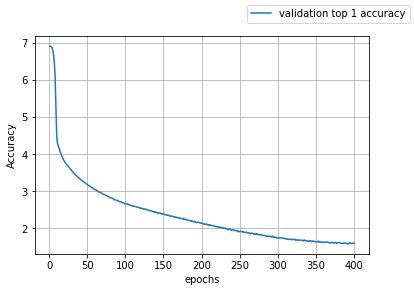

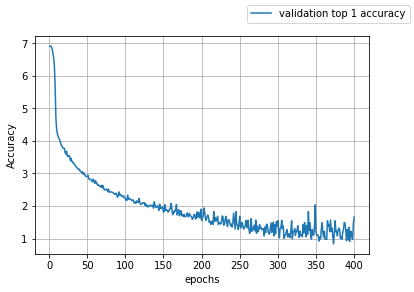

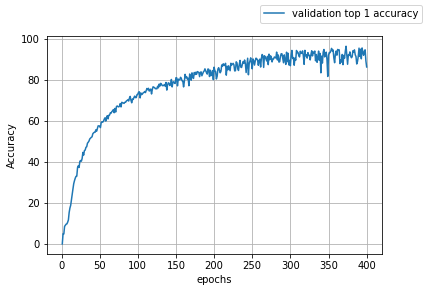

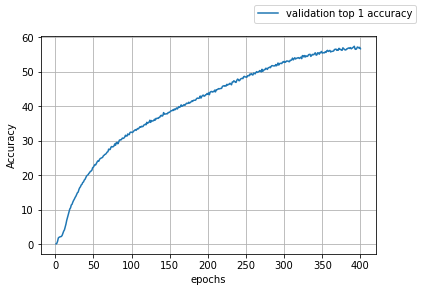

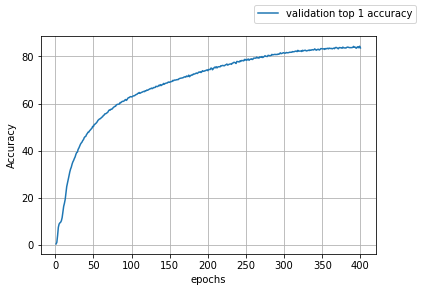

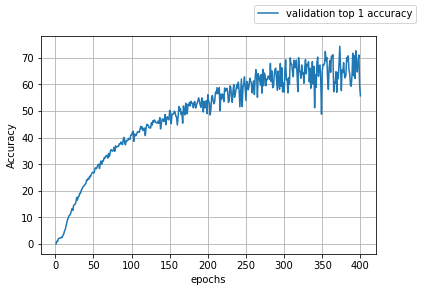

In [36]:

for fold in main_lst:
    new_fold = os.path.join('/home/jd.guerrero/Documents/g.esposito/AlternativeModels-SC2/', fold)
    epochs = os.listdir(new_fold)
    for step in epochs:
        if step != '.DS_Store':
            new_step = os.path.join(new_fold, step)
            steps = os.listdir(new_step)
            for gamma in steps:
                if gamma != '.DS_Store':
                    new_gamma = os.path.join(new_step, gamma)
                    start_lrs = os.listdir(new_gamma)
                    for lr in start_lrs:
                        if lr != '.DS_Store':
                            new_lrs = os.path.join(new_gamma, lr)
                            weights = os.listdir(new_lrs)
                            for weight in weights:
                                if weight != '.DS_Store':
                                    new_weights = os.path.join(new_lrs, weight)
                                    weights = os.listdir(new_weights)
                                    print(new_weights)
                                    for csv in weights: 
                                        if csv != '.DS_Store':
                                            abs_file_path = os.path.join(new_weights, csv)
                                            if csv.endswith('csv'):
                                                csv_abs_path = os.path.join(new_weights, csv)
                                                # print(csv_abs_path)
                                                curve_name = csv_abs_path.split('.csv')[0].split('/')[-1].replace(' ', '')
                                                exec(f'df_{curve_name} = pd.read_csv(csv_abs_path)')
                                                current_df = pd.read_csv(csv_abs_path)
                                                if 'acc' in curve_name:
                                                    print(f"{curve_name} (max): {max(current_df['Value'])}")
                                                else: 
                                                    print(f"{curve_name} (min): {min(current_df['Value'])}")
                                                
                                                fig, ax = plt.subplots(1,1)
                                                ax.set_xlabel('epochs')
                                                ax.set_ylabel('Accuracy')
                                                ax.grid()
                                                sns.lineplot(data = current_df, x = 'Step', y='Value', ax=ax)
                                                fig.legend(loc='upper right', labels=['validation top 1 accuracy'])
                                                fig.savefig(os.path.join(new_weights, f"val_acc.jpg"))
                                                
                                                # print(os.path.join(new_weights, f"{csv_abs_path.split('.csv')[0]}.jpg"))
                                                # fig.savefig(os.path.join(new_weights, f"{csv_abs_path.split('.csv')[0]}.jpg"))
                                                # os.remove(csv_abs_path)
                                            else:
                                                os.remove(abs_file_path)
                                    # fig, ax = plt.subplots(1,1)
                                    # ax.set_xlabel('epochs')
                                    # ax.set_ylabel('Accuracy')
                                    # ax.grid()
                                    # sns.lineplot(data = df_val_acc1, x = 'Step', y='Value', ax=ax)
                                    # sns.lineplot(data = df_val_acc5, x = 'Step', y='Value', ax=ax)
                                    # fig.legend(loc='upper right', labels=['validation top 1 accuracy', 'validation top 5 accuracy'])
                                    # fig.savefig(os.path.join(new_weights, f"val_acc.jpg"))

                                    # fig, ax = plt.subplots(1,1)
                                    # ax.set_xlabel('epochs')
                                    # ax.set_ylabel('Loss')
                                    # ax.grid()
                                    # sns.lineplot(data = df_val_loss, x = 'Step', y='Value', ax=ax)
                                    # sns.lineplot(data = df_train_loss, x = 'Step', y='Value', ax=ax)
                                    # fig.legend(loc='upper right', labels=['validation loss', 'training loss'])
                                    # fig.savefig(os.path.join(new_weights, f"losses.jpg"))
